<a href="https://colab.research.google.com/github/lattehauma/-/blob/main/lotte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df1=pd.read_csv('/content/drive/MyDrive/colab/lotte/LPOINT_BIG_COMP_01_DEMO.csv')
df2=pd.read_csv('/content/drive/MyDrive/colab/lotte/LPOINT_BIG_COMP_02_PDDE.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df1.head()

,cust,ma_fem_dv,ages,zon_hlv
0,M000034966,여성,40대,Z07
1,M000059535,여성,30대,Z12
2,M000136117,여성,30대,Z11
3,M000201112,여성,50대,Z17
4,M000225114,여성,40대,Z17


In [4]:
df2.head()

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1


In [5]:
len(df2.cust.unique())

26917

In [6]:
len(df2)

4381743

In [7]:
cust_count=df2.cust.value_counts()

In [8]:
cust_count.head(20)

M057015266    12448
M919374790    10049
M287960590     2564
M763326819     2524
M124357021     2143
M935231621     1998
M851925709     1924
M056145651     1890
M062470149     1873
M447821725     1861
M006407679     1855
M155305167     1837
M880029153     1822
M221139757     1814
M150523089     1801
M282063613     1798
M569847687     1770
M894002955     1765
M823558048     1733
M950449432     1701
Name: cust, dtype: int64

In [9]:
cust_count=cust_count[2:]

In [10]:
print(len(cust_count))
cust_count.head(10)

26915


M287960590    2564
M763326819    2524
M124357021    2143
M935231621    1998
M851925709    1924
M056145651    1890
M062470149    1873
M447821725    1861
M006407679    1855
M155305167    1837
Name: cust, dtype: int64

만건이 넘는 애들은 너무 특이값 같아서 제외했습니다요 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


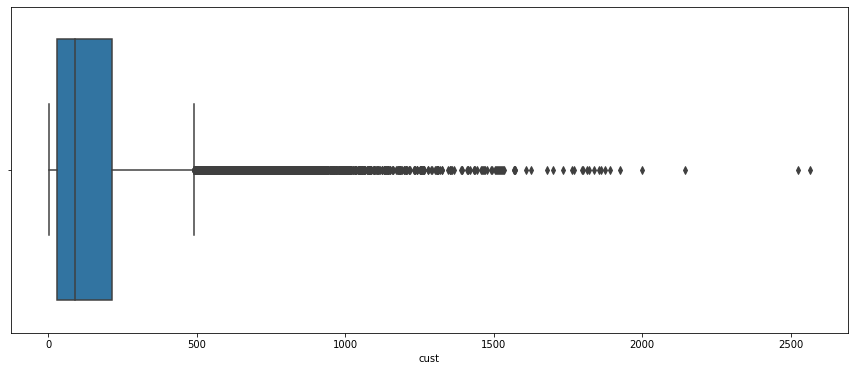

In [11]:
plt.figure(figsize=(15,6))
sns.boxplot(cust_count)

최소 25%의 사람들은 약 500건 이상의 결제 데이터를 가지고 있음을 확인할 수 있다. 

In [12]:
import numpy as np
np.median(cust_count)

88.0

50% 이상의 사람들은 88건 이상의 결제 데이터를 가지고 있습니다. 위에 비하면 적은 수준의 데이터 양이지만 역시나 활용할 수 있는 데이터라고 생각. 
소비 유형을 파악하기 위해서는 최소 88건 정도의 결제 기록은 있는 것이 좋을 듯. 만 명 정도는 이 결제 기록을 가지고 있다고 보는게 좋을 것 같다. 물론 quantile 75%도 써도 될 것 같음. 그럼 1만 5천명 정도의 자료를 쓸 수 있을 것 같다.

In [13]:
counth=cust_count[(cust_count>=88)]

In [14]:
len(counth)
#88건 이상의 결제기록을 가지고 있는 사람들의 수

13498

## 어떤 분야에 소비를 가장 자주 했을까?

In [15]:
len(df2['pd_c'].unique())

1933

상품의 종류가 그렇게까지 많지는 않네요 
-> 그럼 상품 하나하나가 아니라 유형에 하나씩 상품 코드를 붙인 것 같은데?

In [16]:
dfcount=df2.groupby('cust')['pd_c'].agg(**{
    'most_count':lambda x:x.mode()
}).reset_index()

In [17]:
dfcount.head(10)

,cust,most_count
0,M000034966,"[PD0232, PD0630, PD0952, PD1313]"
1,M000136117,PD0298
2,M000201112,"[PD0217, PD1243]"
3,M000225114,PD0232
4,M000261625,PD1689
5,M000350564,PD1776
6,M000419293,PD0298
7,M000494848,PD0298
8,M000504230,PD1330
9,M000508243,"[PD0646, PD0787, PD0891, PD0896]"


In [18]:
counth = counth.reset_index()

In [19]:
counth.columns=['cust','count']
counth.head(5)

,cust,count
0,M287960590,2564
1,M763326819,2524
2,M124357021,2143
3,M935231621,1998
4,M851925709,1924


In [20]:
most=pd.merge(counth, dfcount, on='cust')
most.tail(20)

,cust,count,most_count
13478,M130588496,88,PD0177
13479,M670375876,88,PD0401
13480,M978665704,88,PD0870
13481,M790423320,88,PD1157
13482,M733473360,88,PD1331
13483,M938682286,88,PD1694
13484,M250977423,88,PD1330
13485,M833218147,88,PD0480
13486,M270397441,88,PD0298
13487,M445465017,88,PD1718


아니 저 세 개 두 개짜리는 어떻게 처리하면 좋을까... 그렇게 많지는 않은 것 같아서 일단은 동등하게 하나짜리로 계산을 해볼게요 

In [21]:
most1=most.apply(lambda x: pd.Series(x['most_count']), axis=1).stack().reset_index(level=1, drop=True)

In [22]:
most1=pd.DataFrame(most1)
most1=most1.reset_index()

In [23]:
most2=most['count'].reset_index()

In [24]:
most3=pd.merge(most1,most2, how='left', on='index')
most3.tail(10)

,index,0,count
15058,13489,PD1685,88
15059,13490,PD1684,88
15060,13491,PD0288,88
15061,13491,PD1160,88
15062,13492,PD1694,88
15063,13493,PD1343,88
15064,13494,PD0957,88
15065,13495,PD0777,88
15066,13496,PD1245,88
15067,13497,PD0480,88


In [25]:
most3=most3.drop('index', axis=1)
most3.columns=['most','count']

In [26]:
most3['most'].value_counts()

PD1484    1172
PD0232     917
PD0480     707
PD1156     705
PD0288     575
          ... 
PD1584       1
PD0159       1
PD1725       1
PD0151       1
PD1718       1
Name: most, Length: 639, dtype: int64

In [27]:
len(most3)

15068

In [28]:
most['count_num']=most['most_count']
most.head(10)

,cust,count,most_count,count_num
0,M287960590,2564,PD1164,PD1164
1,M763326819,2524,PD1333,PD1333
2,M124357021,2143,PD1152,PD1152
3,M935231621,1998,PD0529,PD0529
4,M851925709,1924,PD1153,PD1153
5,M056145651,1890,PD1331,PD1331
6,M062470149,1873,PD0241,PD0241
7,M447821725,1861,PD0232,PD0232
8,M006407679,1855,PD1154,PD1154
9,M155305167,1837,PD0480,PD0480


In [29]:
def num_fun(xx):
  return xx[2:]

In [30]:
most['count_num']=most['most_count'].apply(num_fun)

In [31]:
most.head(10)

,cust,count,most_count,count_num
0,M287960590,2564,PD1164,1164
1,M763326819,2524,PD1333,1333
2,M124357021,2143,PD1152,1152
3,M935231621,1998,PD0529,0529
4,M851925709,1924,PD1153,1153
5,M056145651,1890,PD1331,1331
6,M062470149,1873,PD0241,0241
7,M447821725,1861,PD0232,0232
8,M006407679,1855,PD1154,1154
9,M155305167,1837,PD0480,0480


In [32]:
most.dtypes

cust          object
count          int64
most_count    object
count_num     object
dtype: object

In [33]:
most['count_num'] = pd.to_numeric(most['count_num'],errors = 'coerce')

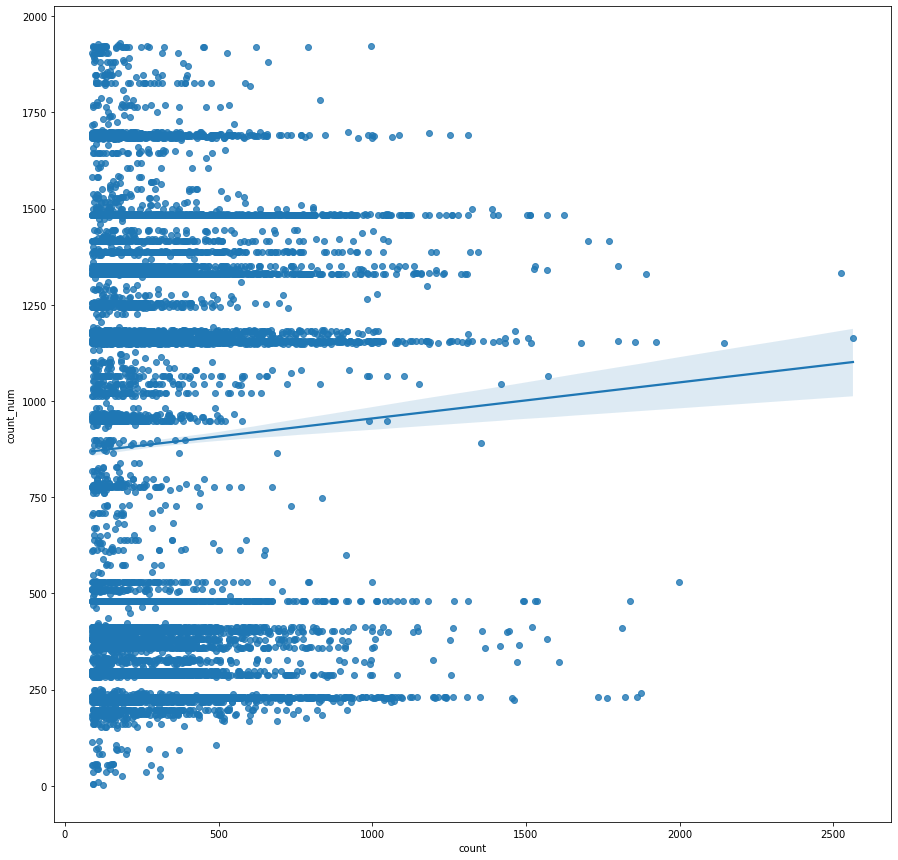

In [34]:
plt.figure(figsize=(15,15))
sns.regplot(x='count',y='count_num', data=most, fit_reg=True)

In [35]:
most['most_count'].value_counts().head(10)

PD1484    1002
PD0232     761
PD0480     604
PD1156     593
PD0288     536
PD0298     423
PD0228     322
PD1331     305
PD1330     284
PD0403     238
Name: most_count, dtype: int64

## 소비 시간대가 얼마나 다양하게 나타날까


In [36]:
df2['de_hr']

0          10
1          10
2          10
3          10
4          10
           ..
4381738    23
4381739    23
4381740    23
4381741    23
4381742    23
Name: de_hr, Length: 4381743, dtype: int64

In [37]:
dftime=df2.groupby('cust')['de_hr'].mean()
dftime=pd.DataFrame(dftime)
dftime.columns=['hrmean']

In [38]:
dftime.head()

,hrmean
cust,
M000034966,16.745098
M000136117,15.348624
M000201112,11.857143
M000225114,17.477987
M000261625,15.507463


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


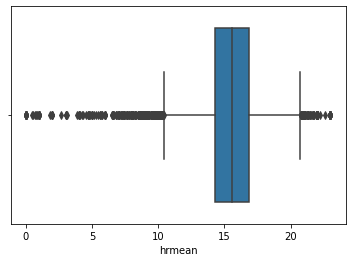

In [39]:
sns.boxplot(dftime['hrmean'])

In [40]:
dftime1=df2.groupby('cust')['de_hr'].var()
dftime1=pd.DataFrame(dftime1)
dftime1.columns=['hrvar']

In [41]:
dftime1.head()

,hrvar
cust,
M000034966,5.153725
M000136117,3.469929
M000201112,56.228571
M000225114,4.808057
M000261625,5.405246


In [42]:
dftime2=pd.merge(dftime,dftime1, on='cust')
dftime2.head()

,hrmean,hrvar
cust,,
M000034966,16.745098,5.153725
M000136117,15.348624,3.469929
M000201112,11.857143,56.228571
M000225114,17.477987,4.808057
M000261625,15.507463,5.405246


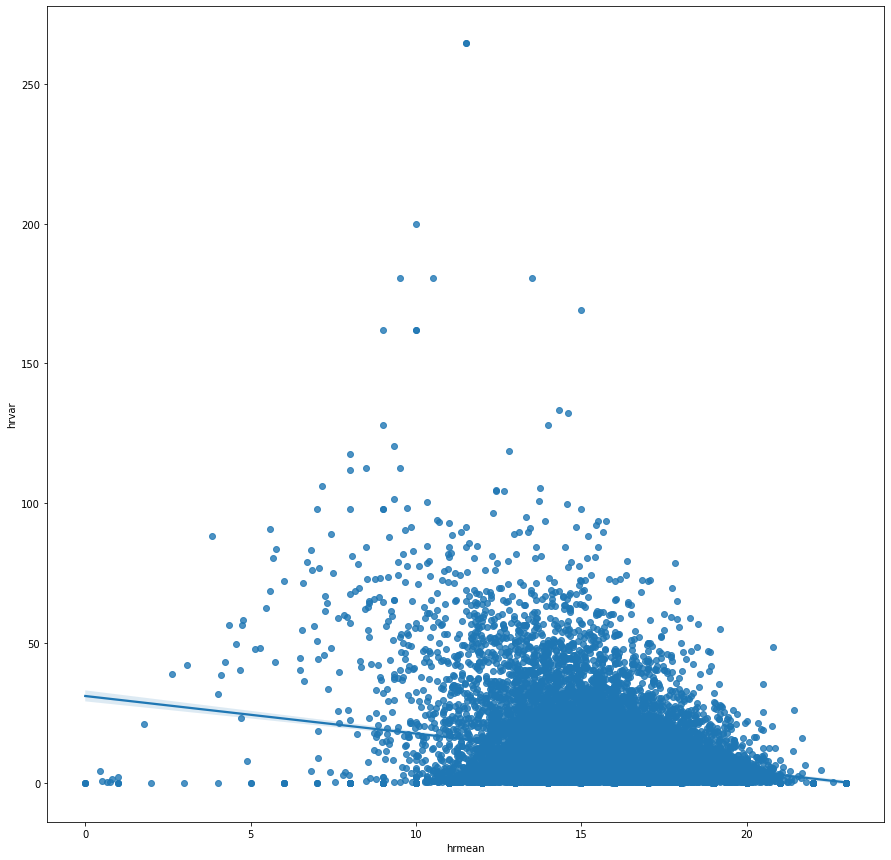

In [43]:
plt.figure(figsize=(15,15))
sns.regplot(x='hrmean',y='hrvar', data=dftime2, fit_reg=True)


아무래도 당연한 거긴 한데…. 낮에 소비하는 사람들은 상대적으로 낮에만 소비를 하고 새벽에 소비하는 사람들은 이 시간 저 시간에 소비를 다양하게 하고 있는듯

In [44]:
dftime3=pd.merge(dftime2,df1, on='cust')

In [45]:
dftime3.head()

,cust,hrmean,hrvar,ma_fem_dv,ages,zon_hlv
0,M000034966,16.745098,5.153725,여성,40대,Z07
1,M000136117,15.348624,3.469929,여성,30대,Z11
2,M000201112,11.857143,56.228571,여성,50대,Z17
3,M000225114,17.477987,4.808057,여성,40대,Z17
4,M000261625,15.507463,5.405246,여성,40대,Z17


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text

<Figure size 1080x1080 with 0 Axes>

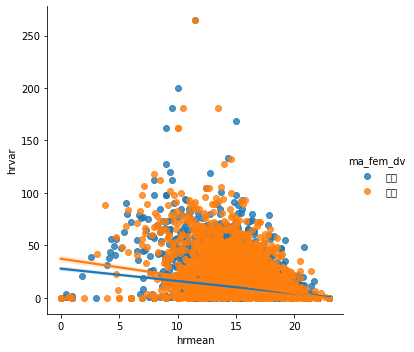

In [46]:
plt.figure(figsize=(15,15))
sns.lmplot(x='hrmean',y='hrvar', data=dftime3, fit_reg=True, hue='ma_fem_dv')
plt.show()

여성과  남성성이  좀  차차이이가  있있나나? 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


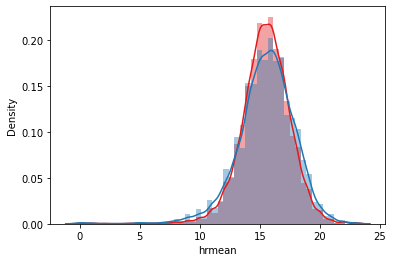

In [47]:
sns.distplot(dftime3['hrmean'].loc[dftime3['ma_fem_dv']=='여성'].dropna(),
             color=sns.color_palette("Paired")[5])
sns.distplot(dftime3['hrmean'].loc[dftime3['ma_fem_dv']=='남성'].dropna())

아씁...이이거  성성별별별별로  상상품  사사는는거  다다른른지지도  좀  볼볼걸걸그그랬랬구구만만....

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


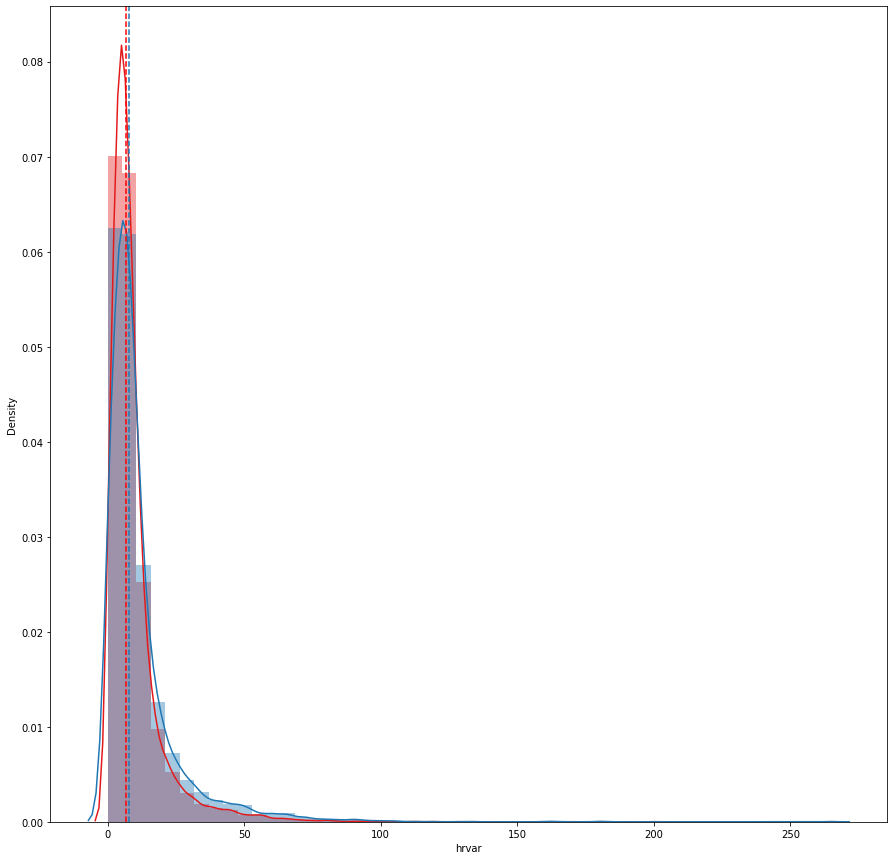

In [48]:
plt.figure(figsize=(15,15))
sns.distplot(dftime3['hrvar'].loc[dftime3['ma_fem_dv']=='여성'].dropna(),
             color=sns.color_palette("Paired")[5])
sns.distplot(dftime3['hrvar'].loc[dftime3['ma_fem_dv']=='남성'].dropna())
plt.axvline(dftime3['hrvar'].loc[dftime3['ma_fem_dv']=='여성'].median(),
            color='r', linestyle='dashed')
plt.axvline(dftime3['hrvar'].loc[dftime3['ma_fem_dv']=='남성'].median(), linestyle='dashed')

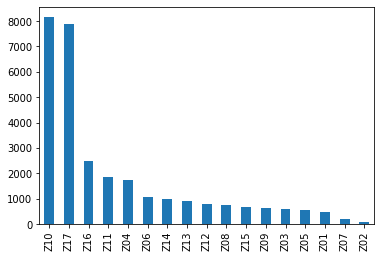

In [49]:
df1.zon_hlv.value_counts().plot(kind='bar')


다다자자레레님  코코드드를  빌빌려려왔왔어어요요 지지역역적  특특징징을  살살펴펴보보기  위위해해서서...Z12번번과  Z10번번(서서울울이이나  경경기기겠겠지지) 사사용  패패턴턴을  비비교교해해봅봅시시다다

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


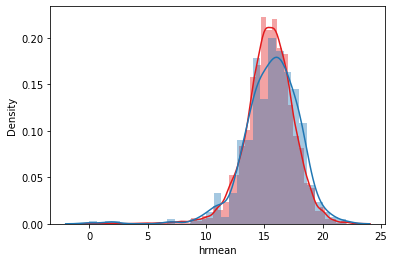

In [50]:
sns.distplot(dftime3['hrmean'].loc[dftime3['zon_hlv']=='Z10'].dropna(),
             color=sns.color_palette("Paired")[5])
sns.distplot(dftime3['hrmean'].loc[dftime3['zon_hlv']=='Z09'].dropna())

지역  별  차차이이가  그그렇렇게  두두드드러러지지지지는  않않네네요  그그럼  연연령령별

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

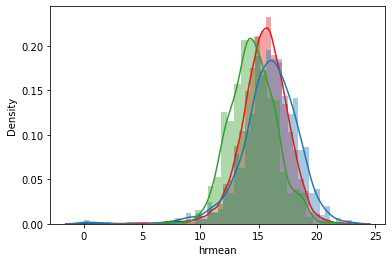

In [51]:
sns.distplot(dftime3['hrmean'].loc[dftime3['ages']=='40대'].dropna(),
             color=sns.color_palette("Paired")[5])
sns.distplot(dftime3['hrmean'].loc[dftime3['ages']=='20대'].dropna())
sns.distplot(dftime3['hrmean'].loc[dftime3['ages']=='70대'].dropna(),
             color=sns.color_palette("Paired")[3])

파파란란색  20대  빨빨간간색  40대  초초록록색  70대  당당연연하하지지만  차차이이가  나나는  것    같같습습니니다  

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

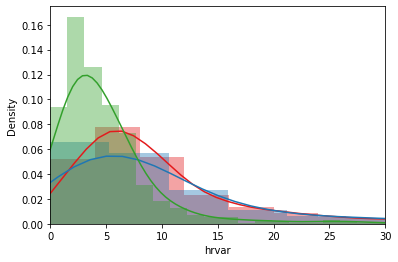

In [52]:
sns.distplot(dftime3['hrvar'].loc[dftime3['ages']=='40대'].dropna(),
             color=sns.color_palette("Paired")[5])
sns.distplot(dftime3['hrvar'].loc[dftime3['ages']=='20대'].dropna())
sns.distplot(dftime3['hrvar'].loc[dftime3['ages']=='70대'].dropna(),
             color=sns.color_palette("Paired")[3])
plt.xlim(0, 30)
plt.show()

## 연달아서 어떤 상품을 살 확률이 높을까

In [53]:
df3=pd.read_csv('/content/drive/MyDrive/colab/lotte/LPOINT_BIG_COMP_03_COP_U.csv')
df4=pd.read_csv('/content/drive/MyDrive/colab/lotte/LPOINT_BIG_COMP_04_PD_CLAC.csv')

In [54]:
df4.head()

,pd_c,pd_nm,clac_hlv_nm,clac_mcls_nm
0,PD0001,소파,가구,거실가구
1,PD0002,스툴/리빙의자,가구,거실가구
2,PD0003,탁자,가구,거실가구
3,PD0004,장식장/진열장,가구,거실가구
4,PD0005,기타가구,가구,기타가구


In [55]:
df2_1=df2

In [56]:
df2_1['pd_c'] = df2_1.groupby(['cust','de_dt'])['pd_c'].transform(lambda x: ', '.join(x))

In [57]:
df2_1=df2_1[['cust','de_dt','pd_c']]
df2_1 = df2_1.drop_duplicates().reset_index(drop = True)

In [58]:
df2_1.head()

,cust,de_dt,pd_c
0,M430112881,20210101,"PD0290, PD0290, PD0290, PD0290, PD1692, PD0620..."
1,M646853852,20210101,PD1369
2,M669384418,20210101,"PD0958, PD0951"
3,M886923095,20210101,PD1181
4,M707991383,20210101,"PD0900, PD0900, PD0900, PD1364, PD0871, PD1683..."


In [59]:
print(len(df2))
len(df2_1)

4381743


859288

In [60]:
len(df4)

1933

In [61]:
pd=df2_1['pd_c'].to_numpy()
pd2=df4['pd_c'].to_numpy()

In [62]:
a = np.zeros(shape=(1933,1933))
print(a.shape)

(1933, 1933)


In [63]:
for i in range(0,859288):
  for j in range(0,1932):
    if pd2[j] in pd[i]:
      for k in range(j,1933):
        if pd2[k] in pd[i]:
          a[j][k]=+1

In [64]:
a[1].sum()

450.0

In [65]:
for i in range(0,859288):
  c=+1

In [67]:
df1[df1['cust']=='M671933338']

,cust,ma_fem_dv,ages,zon_hlv
20127,M671933338,여성,50대,Z10


In [68]:
df4['clac_mcls_nm'].unique()

array(['거실가구', '기타가구', '사무용/학생용가구', '수납가구', '시공/DIY가구', '야외용가구', '유아동가구',
       '주방가구', '침실가구', '건강보조식품', '건강진액', '꿀', '영양제', '홍삼/인삼가공식품', '건강가전',
       '건강관리용품', '건강측정용품', '안마/찜질용품', '일반의약외품', '일반의약품', '건어물',
       '건해산물선물세트', '반건생선', '해조류', '난방가전', '냉방가전', '공구', '보수용품', '안전용품',
       '전기용품', '건과일', '견과류', '과일선물세트', '국산과일', '냉동과일', '수입과일', '간식/안주형과자',
       '과자세트', '껌', '비스킷류', '사탕/캔디', '스낵류', '전통과자류', '초콜릿', '파이류', '골프',
       '기타구기/필드스포츠', '농구', '배구', '배드민턴', '야구', '축구', '탁구', '테니스', '보험',
       '기타', '기프트', '렌탈수수료', '소모품', '용기보증금', '임대매출', '특판', '남성의류상의',
       '남성의류세트', '남성의류아우터', '남성의류전신', '남성의류하의', '남성특수목적의류', '남성특수소재의류',
       '냉동간편식', '아이스크림', '냉장/냉동고', '세탁기', '냉장간편식', '냉장음료', '디저트', '어묵/맛살',
       '포장반찬', '햄/소시지', '일반담배', '전자담배', '특수담배', '건면', '레토르트', '봉지라면',
       '분말조리식', '빵', '시리얼', '용기라면', '모바일기기', '모바일액세서리', '교육보조재', '노트',
       '미술용품', '사무기기', '사무용지/서식지', '일반문구/사무용품', '파티/팬시용품', '필기도구',
       '농산물병통조림', '병통조림선물세트', '수산물통조림', '잼', '축산물통조림', '모바일상품권',
       

과과연  이  349개의  항목목을  어어떻떻게  해해야야할할지  모모르르겠겠다  

In [ ]:
df4.tail(4)